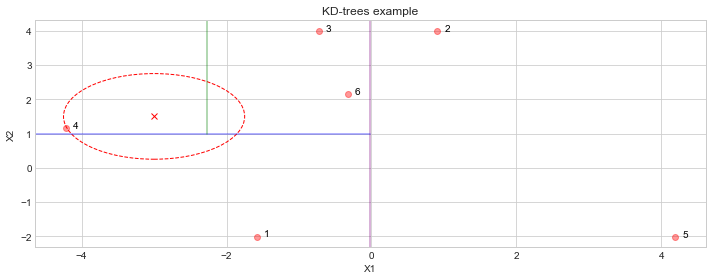

first split value: -0.015
second split value: 0.995
third split value: -2.275


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

labels = list(range(1,7))
x1 = [-1.58, 0.91, -0.73, -4.22, 4.19, -0.33]
x2 = [-2.01, 3.98, 4.00, 1.16, -2.02, 2.15]


plt.figure(figsize=(10,4))
plt.plot(x1, x2, 'o', color='r', alpha=0.4);
for i, txt in enumerate(labels):
    plt.annotate(txt, (x1[i]+0.1, x2[i]), color='black')
plt.xlabel('X1')
plt.ylabel('X2');
plt.axvline(x=(min(x1)+max(x1))/2, color='purple', alpha=0.4)
plt.axhline(y=(4.00-2.01)/2, xmax=0.50, color='blue', alpha=0.4)
plt.axvline(x=(-4.22+-0.33)/2, ymin=0.50, color='green', alpha=0.4)
plt.plot(-3, 1.5, 'x', color='r')
plt.title('KD-trees example')
circ=plt.Circle(xy=(-3, 1.5), radius=1.25, color='r', fill=False, linestyle='--')
plt.gca().add_artist(circ)
plt.tight_layout()
plt.show()

print('first split value: %.3f' % float((min(x1)+max(x1))/2))
print('second split value: %.3f' % float((4.00-2.01)/2))
print('third split value: %.3f' % float((-4.22+-0.33)/2))

In [78]:
inverse = False

def kd_tree(x, y): 
    '''
        The following function will iterate through two lists using the average value to split on.
        The function also swaps continuously between x and y.
    '''
    
    global inverse
    if inverse:
        minimum, maximum = min(y), max(y)
        inverse=False
        
        split = (minimum+maximum)/2
        print('y axis split: %.3f' % split)

        split1 = [[x[i],y[i]] for i in range(0,len(y)) if y[i] > split]
        split2 = [[x[i],y[i]] for i in range(0,len(y)) if y[i] < split]
        
        if len(split1) > 2:
            kd_tree(([i[0] for i in split1]),([i[1] for i in split1]))

        if len(split2) > 2:
            kd_tree(([i[0] for i in split2]),([i[1] for i in split2]))
    else:
        minimum, maximum = min(x), max(x)
        inverse=True
        
        split = (minimum+maximum)/2
        print('x axis split: %.3f' % split)
      
        split1 = [[x[i],y[i]] for i in range(0,len(x)) if x[i] > split]
        split2 = [[x[i],y[i]] for i in range(0,len(x)) if x[i] < split]

        if len(split1) > 2:
            kd_tree(([i[0] for i in split1]),([i[1] for i in split1]))
        if len(split2) > 2:
            kd_tree(([i[0] for i in split2]),([i[1] for i in split2]))

kd_tree(x1,x2)

x axis split: -0.015
y axis split: 0.995
x axis split: -2.275
